# Day 09. Exercise 02
# Metrics

## 0. Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [3]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
y = pd.read_csv('../data/dayofweek.csv')
df.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
X = df
y = y['dayOfWeek']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 📊 Разница между Accuracy, Precision и Recall

---

### ✅ 1️⃣ Accuracy (Общая точность)

**Что значит:**

$$
Accuracy = \frac{\text{Количество верных предсказаний}}{\text{Общее количество предсказаний}}
$$

✅ Показывает **долю всех верных предсказаний среди всех примеров.**

---

🩶 **Пример:**

У тебя есть **100 дней**:
- 90 будни
- 10 выходных

Модель предсказывает **все 100 как будни** (игнорирует выходные).

- Верные предсказания = 90 (будни)
- Общее количество = 100

$$
Accuracy = \frac{90}{100} = 0.90
$$

✅ Модель показывает **90% точности**, но **не нашла ни одного выходного**.

---

### ✅ 2️⃣ Precision (Точность по положительным предсказаниям)

**Что значит:**

$$
Precision = \frac{TP}{TP + FP}
$$

✅ Показывает **из всех предсказанных “выходных”, сколько реально были выходными**.

---

🩶 **Пример:**

Модель предсказала:
- 10 дней как выходные.
- Из них **7 реально были выходными**.

$$
Precision = \frac{7}{10} = 0.70
$$

✅ Это показывает, **насколько “чистые” твои предсказания выходных**.

---

### ✅ 3️⃣ Recall (Полнота)

**Что значит:**

$$
Recall = \frac{TP}{TP + FN}
$$

✅ Показывает **из всех реальных “выходных”, сколько модель смогла найти**.

---

🩶 **Пример:**

В реальности **20 выходных**, модель правильно предсказала **7 из них как выходные**.

$$
Recall = \frac{7}{20} = 0.35
$$

✅ Это показывает, **насколько модель “чувствительна” к нахождению выходных**.

---

## 🎯 **Ключ для запоминания:**

✅ **Accuracy**  
> “Из всех прогнозов, сколько верных?”

✅ **Precision**  
> “Из всех предсказанных ‘ДА’, сколько действительно ‘ДА’?”

✅ **Recall**  
> “Из всех реальных ‘ДА’, сколько нашли?”




## 📈 Что такое ROC и AUC

---

### ✅ Что такое ROC-кривая

**ROC (Receiver Operating Characteristic) кривая** показывает, **как меняется работа модели при изменении порога классификации**.

---

### 🩶 **Оси:**

- **X (Горизонталь): False Positive Rate (FPR)**

$$
FPR = \frac{FP}{FP + TN}
$$

Показывает, **какая доля НЕ положительных предсказаны как положительные.**

---

- **Y (Вертикаль): True Positive Rate (TPR) = Recall**

$$
TPR = \frac{TP}{TP + FN}
$$

Показывает, **какая доля настоящих положительных найдена.**

---

### ✅ Как работает:

- У модели есть **вероятности предсказания** (например, вероятность, что день = выходной = 0.8).
- Мы **меняем порог (threshold)**, при котором модель говорит «да».
- Для каждого порога считаем:
  - FPR
  - TPR
- Строим кривую **TPR vs FPR**.

✅ **Чем выше и левее кривая, тем лучше модель.**

---

## ✅ Что такое AUC (Area Under Curve)

**AUC = площадь под ROC-кривой.**

- **AUC = 0.5** → модель работает как случайная (подбрасывание монетки).
- **AUC = 1.0** → идеальная модель.
- **Чем ближе к 1, тем лучше модель различает классы.**

---

### 🩶 **Пример:**

Если AUC = 0.85, это значит:

> “С вероятностью 85% модель правильно различит случай с классом 1 и классом 0.”

---

## 📊 Примерная ROC-кривая

```
^
|            **************
|         **              **
|       **                  **
|     **                      **
|   **                          **
| **                              **
+------------------------------------>
0                                   1
```

✅ Площадь под этой кривой и есть **AUC.**

---

## 🎯 **Ключ для запоминания:**

✅ **ROC-кривая**:
> Показывает **способность модели отличать классы при разных порогах.**

✅ **AUC**:
> Дает **одно число для оценки качества модели: чем больше, тем лучше.**

✅ Используется для:
- Сравнения моделей между собой.
- Оценки качества модели независимо от выбранного порога.



## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [6]:
svm = SVC(kernel='rbf', C=10, gamma='auto', class_weight=None, random_state=21, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_score = svm.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [7]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=22, class_weight='balanced', random_state=21)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_score = tree.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.89053
precision is 0.89262
recall is 0.89053
roc_auc is 0.93664


## 4. Random forest

1. The same task for random forest.

In [8]:
forest = RandomForestClassifier(n_estimators=50, max_depth=28, class_weight='balanced', random_state=21)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
y_score = forest.predict_proba(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.93491
precision is 0.93675
recall is 0.93491
roc_auc is 0.98568


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

In [12]:
forest = RandomForestClassifier(n_estimators=50, max_depth=28, class_weight='balanced', random_state=21)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.98      0.95      0.96        55
           2       0.97      0.93      0.95        30
           3       0.95      0.96      0.96        80
           4       0.95      0.86      0.90        21
           5       0.89      0.94      0.92        54
           6       0.90      0.99      0.94        71

    accuracy                           0.93       338
   macro avg       0.94      0.91      0.92       338
weighted avg       0.94      0.93      0.93       338



In [14]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20,  0,  0,  0,  1,  1,  5],
       [ 1, 52,  0,  0,  0,  1,  1],
       [ 0,  0, 28,  2,  0,  0,  0],
       [ 0,  1,  1, 77,  0,  0,  1],
       [ 0,  0,  0,  0, 18,  3,  0],
       [ 0,  0,  0,  2,  0, 51,  1],
       [ 0,  0,  0,  0,  0,  1, 70]])

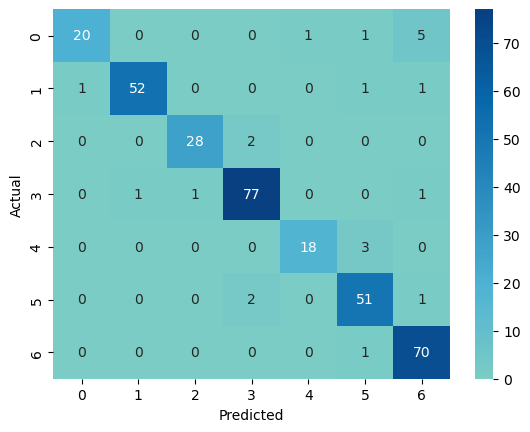

In [15]:
sns.heatmap(matrix, annot=True, cmap="GnBu", center=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
df_test = pd.merge(X_test, y_test, left_index=True, right_index=True)
df_test['prediction'] = y_pred
df_test.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayOfWeek,prediction
1087,67,17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
16,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,5
563,14,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,6
1381,20,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
1199,9,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2


In [26]:
def show_most_errors(name):
    columns_to_select = df_test.columns.str.contains(name)
    selected_columns = df_test.columns[columns_to_select]
    df_test['is_correct'] = df_test['prediction'] == df_test['dayOfWeek']
    
    name_df = pd.merge(df_test[selected_columns], df_test[['is_correct']], left_index=True, right_index=True)
    
    grouped = name_df.groupby('is_correct').sum()
    
    count = name_df.shape[0]
    
    # grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=0).fillna(0)
    grouped = grouped.apply(lambda x: x / count * 100).fillna(0)
    grouped = grouped[grouped.index == False]

    
    plt.figure(figsize=(10,8))
    plt.title(f"Процент ошибок по {name}")
    plt.barh(grouped.columns, grouped.values.ravel(), color='#7E2449')
    plt.xlabel('Errors %')
    
    plt.show()

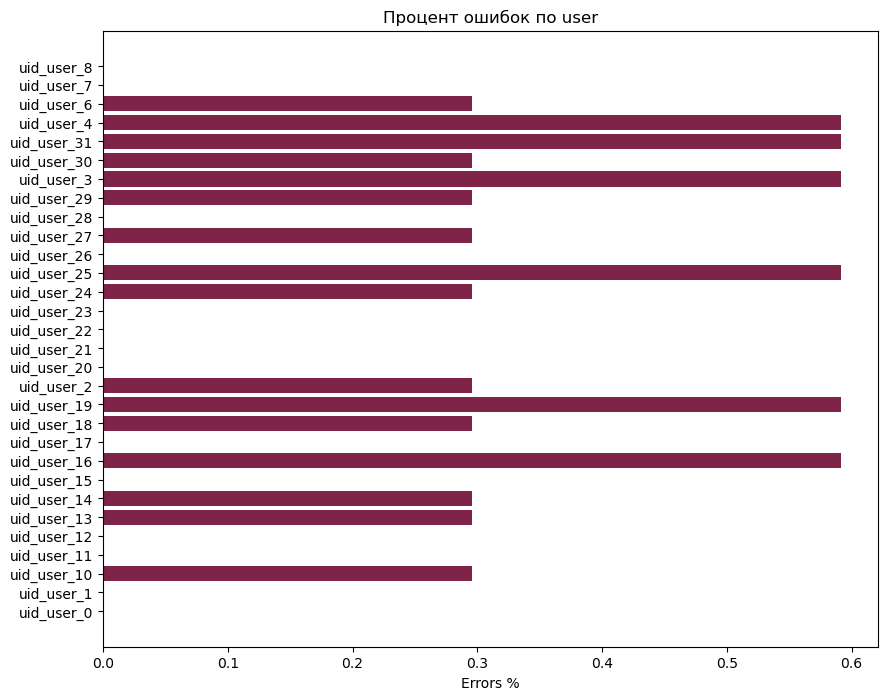

In [27]:
show_most_errors('user')

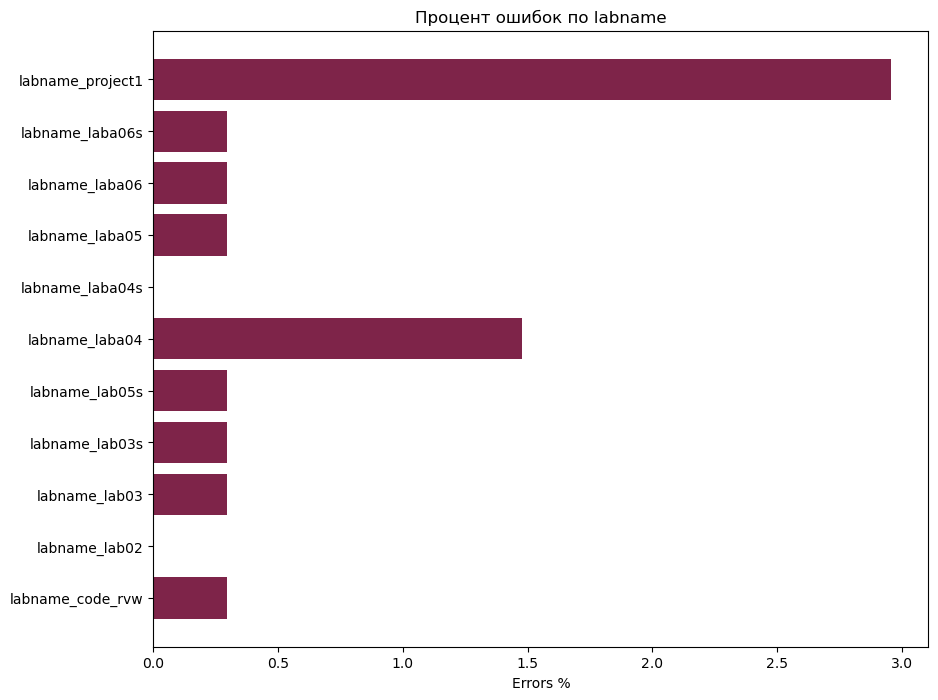

In [28]:
show_most_errors('labname')

In [34]:
joblib.dump(forest, '../data/model_ex02.pkl')

['../data/model_ex02.pkl']

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [36]:

def calc_metrics(models: list, params_list: list, X, y):
    """
    Принимает:
    - models: список моделей без параметров
    - params_list: список словарей с параметрами для каждой модели
    - X: матрица признаков
    - y: вектор таргета

    Возвращает:
    - Список словарей с метриками для каждой модели
    """

    data = []

    # Разбиваем данные на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=21, stratify=y
    )

    # Проходим по моделям и их параметрам
    for model, params in zip(models, params_list):
        model_name = model.__class__.__name__

        # Устанавливаем параметры модели
        model.set_params(**params)

        # Обучаем модель
        model.fit(X_train, y_train)

        # Предсказываем классы
        y_pred = model.predict(X_test)

        # Считаем ROC AUC
        try:
            y_score = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted')
        except AttributeError:
            roc_auc = None  # Если у модели нет predict_proba

        # Считаем метрики
        d = {
            'model': model_name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc
        }

        data.append(d)

    return data


In [37]:
models = [
    RandomForestClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier()
]

params_list = [
    {'n_estimators': 50, 'max_depth': 28, 'class_weight': 'balanced', 'random_state': 21},
    {'kernel': 'rbf', 'C': 10, 'gamma': 'auto', 'class_weight': None, 'random_state': 21},
    {'max_depth': 10, 'criterion': 'gini', 'random_state': 21}
]

In [38]:
results = calc_metrics(models, params_list, X, y)
for res in results:
    print(res)

{'model': 'RandomForestClassifier', 'accuracy': 0.9349112426035503, 'precision': 0.9367453398118224, 'recall': 0.9349112426035503, 'roc_auc': 0.9856759783180085}
{'model': 'SVC', 'accuracy': 0.8875739644970414, 'precision': 0.8926729169690374, 'recall': 0.8875739644970414, 'roc_auc': 0.9787793228216216}
{'model': 'DecisionTreeClassifier', 'accuracy': 0.7337278106508875, 'precision': 0.7523078163571633, 'recall': 0.7337278106508875, 'roc_auc': 0.9080293798854764}
